In [ ]:
!pip install pyntcloud


In [ ]:
!pip install pyrealsense2

     |████████████████████████████████| 16.4MB 263kB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2                                # state of the art computer vision algorithms library
import numpy as np                        # fundamental package for scientific computing
import matplotlib.pyplot as plt           # 2D plotting library producing publication quality figures
from pyntcloud import PyntCloud # open source library for 3D pointcloud visualisation
import pyrealsense2 as rs                 # Intel RealSense cross-platform open-source API
print("Environment Ready")

Environment Ready


In [ ]:
path = "/content/drive/MyDrive/LIDAR/20210301_232716.bag"

In [ ]:

# Setup:
pipe = rs.pipeline()
cfg = rs.config()
cfg.enable_device_from_file(path)
profile = pipe.start(cfg)

# Skip 5 first frames to give the Auto-Exposure time to adjust
for x in range(5):
  pipe.wait_for_frames()
  
# Store next frameset for later processing:
frameset = pipe.wait_for_frames()
color_frame = frameset.get_color_frame()
depth_frame = frameset.get_depth_frame()

# Cleanup:
pipe.stop()
print("Frames Captured")

Frames Captured


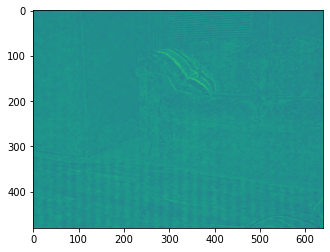

In [ ]:
color = np.asanyarray(color_frame.get_data())
plt.rcParams["axes.grid"] = False
plt.imshow(color)

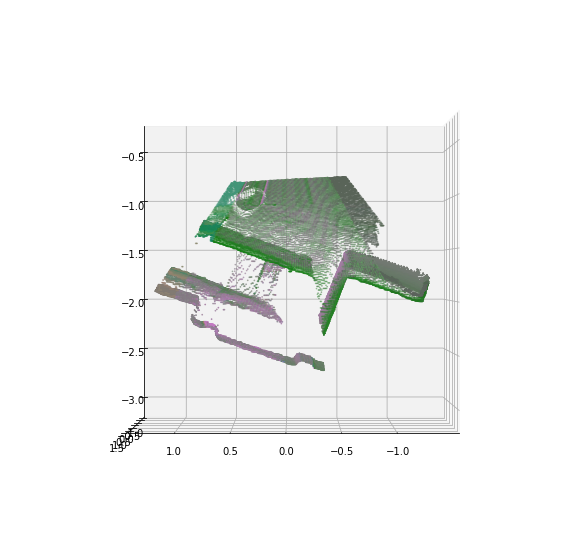

In [ ]:

pc = rs.pointcloud();
pc.map_to(color_frame);
pointcloud = pc.calculate(depth_frame);
pointcloud.export_to_ply("1.ply", color_frame);

#
cloud = PyntCloud.from_file("1.ply");
cloud.plot()